# Communities and Crime Dataset

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Communities and Crime Dataset
missing_values = ["n/a", "na", "--","?"]
dataset = pd.read_csv('communities.data', na_values = missing_values)

In [2]:
# Check if dataset has null values
result = dataset.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())

-> Contains Missing values                 True
-> Total Number of Missing values:         39200
-> Number of Missing values by column
8                  0
?               1173
?.1             1176
Lakewoodcity       0
1                  0
                ... 
0.9.1           1675
0.5.2           1675
0.32.2             0
0.14.3          1675
0.2.2              0
Length: 128, dtype: int64


In [3]:
# Filling Missing values with mean
dataset = dataset.fillna(dataset.mean())

In [4]:
data = pd.DataFrame(dataset)
# Check if dataset has null values
result = data.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())

-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column
8               0
?               0
?.1             0
Lakewoodcity    0
1               0
               ..
0.9.1           0
0.5.2           0
0.32.2          0
0.14.3          0
0.2.2           0
Length: 128, dtype: int64


In [5]:
X = data.iloc[:, :127].values
Y = data.iloc[:, 127].values

print(data)
print(X.shape)
print(Y.shape)

       8          ?           ?.1         Lakewoodcity   1  0.19  0.33  0.02  \
0     53  58.826829  46188.336597          Tukwilacity   1  0.00  0.16  0.12   
1     24  58.826829  46188.336597         Aberdeentown   1  0.00  0.42  0.49   
2     34   5.000000  81440.000000  Willingborotownship   1  0.04  0.77  1.00   
3     42  95.000000   6096.000000    Bethlehemtownship   1  0.01  0.55  0.02   
4      6  58.826829  46188.336597    SouthPasadenacity   1  0.02  0.28  0.06   
...   ..        ...           ...                  ...  ..   ...   ...   ...   
1988  12  58.826829  46188.336597    TempleTerracecity  10  0.01  0.40  0.10   
1989   6  58.826829  46188.336597          Seasidecity  10  0.05  0.96  0.46   
1990   9   9.000000  80070.000000        Waterburytown  10  0.16  0.37  0.25   
1991  25  17.000000  72600.000000          Walthamcity  10  0.08  0.51  0.06   
1992   6  58.826829  46188.336597          Ontariocity  10  0.20  0.78  0.14   

       0.9  0.12  ...  0.12.2  0.26.1  

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give 93.7948904411872 accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressior']
models = [SVR(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          AdaBoostRegressor(),
          GaussianProcessRegressor(kernel=kernel),
          LinearRegression(),
          MLPRegressor()]

param_distributions = {
    'SVR': {'C': [0.1, 1, 10], 'gamma':[0.1, 1,10]},
    'DecisionTreeRegressor': {'max_depth': [10, 20,30,40]},
    'RandomForestRegressor': {'max_depth': [10, 20, 40],'n_estimators': [16, 32, 100]},
    'AdaBoostRegressor': {'n_estimators': [16, 32, 100],'learning_rate' : [0.2,0.4,1]},
    'GaussianProcessRegressor': {'normalize_y': ['True','False']},
    'LinearRegression': {},
    'MLPRegressior': {'hidden_layer_sizes': [(100,),(200,)],'activation':['tanh', 'relu']},
}

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    np.random.seed(0);
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=2, cv=3)
    gridcv.fit(X_train, Y_train)
    Y_pred  = gridcv.best_estimator_.predict(X_test)
    accuracy[counter] = round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 3)
    print("RMSE for " + names[counter] + ": "+str(accuracy[counter]))

RMSE for SVR: 0.232
RMSE for DecisionTreeRegressor: 0.197
RMSE for RandomForestRegressor: 0.137
RMSE for AdaBoostRegressor: 0.147
RMSE for GaussianProcessRegressor: 0.139
RMSE for LinearRegression: 0.139
RMSE for MLPRegressior: 0.176


Text(0.5, 1.0, 'Communities and Crime Dataset model accuracy')

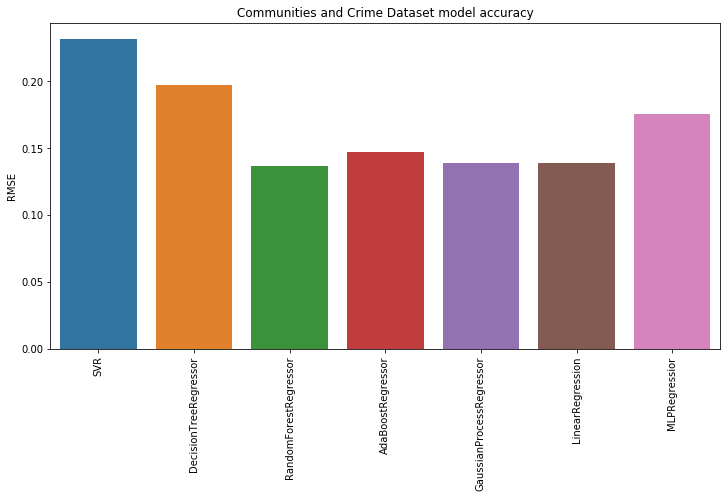

In [10]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('RMSE')
plt.title('Communities and Crime Dataset model accuracy')